## Toronto Housing Pricing Prediction

Scrape the API using zoocasa.com to get sold housing information and transform the data and feet it to the regreesion model to predict the housing pricing based on:

- num of bedroom 
- num of bathroom
- num of parking
- type of property(condo/detached/semi-detached/Townhouse)

The website with the real-time pricing predictor about this project is hosted at:
https://zhengx-94.github.io/toronto-predictive-housing/

In [13]:
import pandas as pd
import urllib
import time
import bs4 as bs
import geopandas as gpd
import seaborn as sns

In [16]:

total_pages = 100
links = pd.DataFrame(columns=['link'])
links_done = 0


for page in range(1,(total_pages + 1)):
    
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    url = "https://www.zoocasa.com/toronto-on-sold-listings?page=" + str(page)
    headers={'User-Agent':user_agent,} 

    request=urllib.request.Request(url,None,headers) #The assembled request
    data_raw = urllib.request.urlopen(request).read()

    data_split = data_raw.split(b'/listing-status>')[1:]
    time.sleep(1)
    
    for post in range(24): 


        start = data_split[post].find(b'href="/')
        end = data_split[post].find(b'-vow"')
        links.loc[links_done] = data_split[post][(start+7):(end+4)]

        links_done += 1
    print('page:',page)
            
links.to_csv('house_links.csv')

page: 1
page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10
page: 11
page: 12
page: 13
page: 14
page: 15
page: 16
page: 17
page: 18
page: 19
page: 20
page: 21
page: 22
page: 23
page: 24
page: 25
page: 26
page: 27
page: 28
page: 29
page: 30
page: 31
page: 32
page: 33
page: 34
page: 35
page: 36
page: 37
page: 38
page: 39
page: 40
page: 41
page: 42
page: 43
page: 44
page: 45
page: 46
page: 47
page: 48
page: 49
page: 50
page: 51
page: 52
page: 53
page: 54
page: 55
page: 56
page: 57
page: 58
page: 59
page: 60
page: 61
page: 62
page: 63
page: 64
page: 65
page: 66
page: 67
page: 68
page: 69
page: 70
page: 71
page: 72
page: 73
page: 74
page: 75
page: 76
page: 77
page: 78
page: 79
page: 80
page: 81
page: 82
page: 83
page: 84
page: 85
page: 86
page: 87
page: 88
page: 89
page: 90
page: 91
page: 92
page: 93
page: 94
page: 95
page: 96
page: 97
page: 98
page: 99
page: 100


In [18]:
start_time = time.time()
skipped = []
house_length = links.shape[0]

for no in range(house_length):
    try:
        url = 'https://www.zoocasa.com/' + str(links.link[no])[2:-1]

        #read data, convert to 2 formats
        request=urllib.request.Request(url,None,headers) #The assembled request
        data_raw = urllib.request.urlopen(request).read()
        soup = bs.BeautifulSoup(data_raw, 'lxml')

        #full link
        data.loc[no,'full_link'] = url

        #title
        data.loc[no,'title'] = soup.title.contents[0]

        #MLS
        mls_a = data_raw.find(b'Number</span>\n            <span>')
        mls_b = data_raw[(mls_a+32):].find(b'</span>')
        data.loc[no,'mls'] = data_raw[(mls_a+32):((mls_a+mls_b+32))]

        #Type
        type_a = data_raw.find(b'Type</span>\n            <span>')
        type_b = data_raw[(type_a+30):].find(b'</span>')
        data.loc[no,'type'] = data_raw[(type_a+30):((type_a+type_b+30))]

        #the rest
        table_html = soup.findAll("span", {"class": "blur"})
        for n,c in enumerate(['final_price', 'list_price','bedrooms','bathrooms','sqft','parking','description']):
            data.loc[no, c] = table_html[n].contents[0]

        #location data
        address = soup.title.contents[0]
        address = address.replace('Circ', 'Cir') #edit #1
        address_b = address.find('(')
        address_a = address.find('-')
        
        data.loc[no,'full_address'] = address[(address_a+1):address_b]


        time.sleep(1)
        if no % 10 == 0: print(no, 'is done')
    
    except: 
        print('Problem with: ', no)
        skipped.append(no)
        continue
    
print('Skipped: ', skipped, ', Total: ', len(skipped))
print('Total time: %.2f' % (time.time() - start_time))



0 is done
10 is done
20 is done
30 is done
40 is done
50 is done
60 is done
70 is done
80 is done
90 is done
100 is done
110 is done
120 is done
130 is done
140 is done
150 is done
160 is done
170 is done
180 is done
190 is done
200 is done
210 is done
220 is done
230 is done
240 is done
250 is done
260 is done
270 is done
280 is done
290 is done
300 is done
310 is done
320 is done
330 is done
340 is done
350 is done
360 is done
370 is done
380 is done
390 is done
400 is done
410 is done
420 is done
430 is done
440 is done
450 is done
460 is done
470 is done
480 is done
490 is done
500 is done
510 is done
520 is done
530 is done
540 is done
550 is done
560 is done
570 is done
580 is done
590 is done
600 is done
610 is done
620 is done
630 is done
640 is done
650 is done
660 is done
670 is done
680 is done
690 is done
700 is done
710 is done
720 is done
730 is done
740 is done
750 is done
760 is done
770 is done
780 is done
790 is done
800 is done
810 is done
820 is done
830 is done
840

In [19]:
data.to_excel('data.xlsx')

In [23]:
houses = pd.read_excel('data.xlsx', index_col=0)

# Adding province name and country to be precise
houses[['full_address']] = houses[['full_address']].astype(str) + ', Ontario, Canada'
houses.head(5)

,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,type,full_link,full_address,lat,long,city_district
0,"6 Pendrith St, Toronto (W4813848) | Zoocasa","1,316,000","$1,199,900",2 + 2 beds,3 baths,N/A sq. ft.,1 parking,Welcome To 6 Pendrith; A Stylish Home Thoughtf...,W4813848,Semi-Detached,https://www.zoocasa.com/toronto-on-real-estate...,"6 Pendrith St, Toronto , Ontario, Canada",NaN,NaN,NaN
1,"10 Rutherglen Rd, Toronto (C4802025) | Zoocasa","1,780,000","$1,799,000",4 beds,3 baths,N/A sq. ft.,2 parking,Fabulous South Leaside Renovated Home Situate...,C4802025,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"10 Rutherglen Rd, Toronto , Ontario, Canada",NaN,NaN,NaN
2,"135 St Leonard's Ave, Toronto (C4798578) | Zoo...","3,450,000","$3,495,000",4 + 1 beds,4 baths,N/A sq. ft.,3 parking,* Turnkey Lawrence Park Family Home Walking Di...,C4798578,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"135 St Leonard's Ave, Toronto , Ontario, Canada",NaN,NaN,NaN
3,"49 St Olaves Rd, Toronto (W4785943) | Zoocasa","1,900,000","$1,948,000",7 + 2 beds,7 baths,3500–5000 sq. ft.,3 parking,*Absolutely Fab.Unique 3500Sqft Chateau & 1490...,W4785943,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"49 St Olaves Rd, Toronto , Ontario, Canada",NaN,NaN,NaN
4,"66 Ayers Cres N, Toronto (E4809317) | Zoocasa","720,000","$679,900",2 beds,3 baths,1100–1500 sq. ft.,2 parking,"Newer, Cozy & Upgraded Mattamy Freehold Townho...",E4809317,Att/Row/Twnhouse,https://www.zoocasa.com/toronto-on-real-estate...,"66 Ayers Cres N, Toronto , Ontario, Canada",NaN,NaN,NaN


In [21]:
print('Data shape before procedure: ', houses.shape)

houses.dropna(subset=['final_price'], inplace=True)
houses.drop_duplicates(subset=['mls'], inplace=True)

print('Data shape after procedure: ', houses.shape)

for column in ['final_price', 'list_price']:
    houses[column] = houses[column].apply(lambda b: b.replace(',', '').replace('$', '')).astype('int32')


Data shape before procedure:  (2400, 15)
Data shape after procedure:  (2400, 15)


In [92]:
houses = pd.read_excel('data.xlsx', index_col=0)
df = houses


In [93]:
df['final_price'] = df['final_price'].apply(lambda x: x.replace(',',''))

In [94]:
df['bedrooms'] = df['bedrooms'].apply(lambda x: x[0])

In [95]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: x[0])

In [96]:
df['parking'] = df['parking'].apply(lambda x: x[0] if x[0] !='n' else 0)

In [97]:
df['type'].value_counts()

Condo Apt             1100
Detached               719
Semi-Detached          286
Condo Townhouse        177
Att/Row/Twnhouse        76
Comm Element Condo      24
Co-Ownership Apt         7
Multiplex                3
Link                     3
Triplex                  2
Duplex                   2
Co-Op Apt                1
Name: type, dtype: int64

In [98]:
def prop_type(x):
    if x == 'Condo Apt':
        return 1
    if x == 'Detached':
        return 2
    if x == 'Semi-Detached':
        return 3
    if x == 'Condo Townhouse':
        return 4
    else:
        return 5

In [99]:
df['type'] = df['type'].apply(prop_type)

In [100]:
df_train = df[['final_price','bedrooms','bathrooms','parking','type']]

In [105]:
df_train.head()

,final_price,bedrooms,bathrooms,parking,type
0,1316000,2,3,1,3
1,1780000,4,3,2,2
2,3450000,4,4,3,2
3,1900000,7,7,3,2
4,720000,2,3,2,5


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_train[['bedrooms','bathrooms','parking','type']]
y = df_train[['final_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

In [107]:
reg.coef_

array([[120833.88612427, 372253.57619178,   2276.27412459,
        -75728.77854485]])

In [ ]:
# feature importance plot
pd.Series(model.coef_, X.columns).sort_values().plot('bar');

In [ ]:
# model evaluation
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

print('r2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

Try to use Google Geoencoding API to change the address information to the latitude and longitude, so that more analytics works could be perform, such as joining Toronto Coumminity Average Income Open Data and improve the model's accuracy using more features.

In [18]:
# !pip install googlemaps

In [10]:
import googlemaps
from datetime import datetime
gmaps = googlemaps.Client(key='My-google-geoencoding-api-key')

for row, value in houses.iterrows():
#     try:
    geocode_result = gmaps.geocode(houses.loc[row, 'full_address'])
    houses.loc[row,'lat'] = geocode_result[0]['geometry']['location']['lat']
    houses.loc[row,'long'] = geocode_result[0]['geometry']['location']['lng']
#     except: 
#         print(row, 'SKIPPED')
        
houses.to_csv('houses.csv')

In [5]:
houses = pd.read_csv('houses.csv')

In [6]:
houses.head()

,Unnamed: 0,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,type,full_link,full_address,lat,long,city_district
0,0,"6 Pendrith St, Toronto (W4813848) | Zoocasa",1316000,1199900,2 + 2 beds,3 baths,N/A sq. ft.,1 parking,Welcome To 6 Pendrith; A Stylish Home Thoughtf...,W4813848,Semi-Detached,https://www.zoocasa.com/toronto-on-real-estate...,"6 Pendrith St, Toronto , Ontario, Canada",43.667376,-79.420635,NaN
1,1,"10 Rutherglen Rd, Toronto (C4802025) | Zoocasa",1780000,1799000,4 beds,3 baths,N/A sq. ft.,2 parking,Fabulous South Leaside Renovated Home Situate...,C4802025,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"10 Rutherglen Rd, Toronto , Ontario, Canada",43.701827,-79.363000,NaN
2,2,"135 St Leonard's Ave, Toronto (C4798578) | Zoo...",3450000,3495000,4 + 1 beds,4 baths,N/A sq. ft.,3 parking,* Turnkey Lawrence Park Family Home Walking Di...,C4798578,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"135 St Leonard's Ave, Toronto , Ontario, Canada",43.722819,-79.392267,NaN
3,3,"49 St Olaves Rd, Toronto (W4785943) | Zoocasa",1900000,1948000,7 + 2 beds,7 baths,3500–5000 sq. ft.,3 parking,*Absolutely Fab.Unique 3500Sqft Chateau & 1490...,W4785943,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"49 St Olaves Rd, Toronto , Ontario, Canada",43.642487,-79.475063,NaN
4,4,"66 Ayers Cres N, Toronto (E4809317) | Zoocasa",720000,679900,2 beds,3 baths,1100–1500 sq. ft.,2 parking,"Newer, Cozy & Upgraded Mattamy Freehold Townho...",E4809317,Att/Row/Twnhouse,https://www.zoocasa.com/toronto-on-real-estate...,"66 Ayers Cres N, Toronto , Ontario, Canada",43.716876,-79.281461,NaN


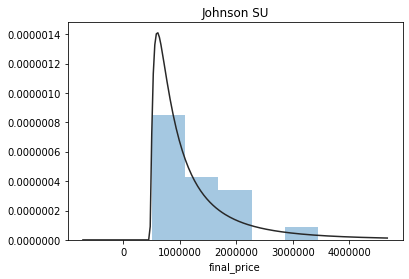

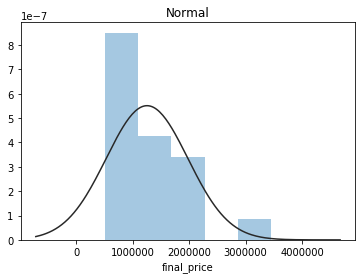

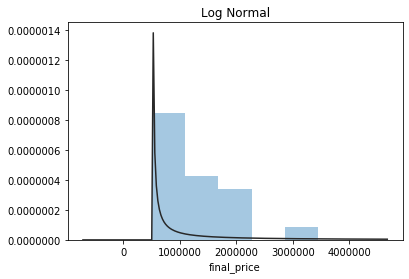

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as st

y = houses['final_price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

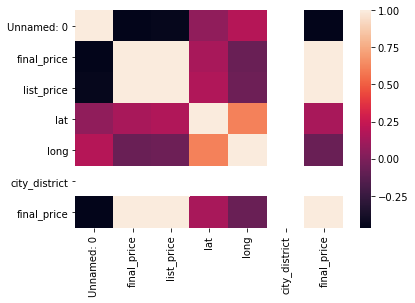

In [10]:
train = houses
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
# quantitative.remove('fin')
# quantitative.remove('Id')

corr = train[quantitative+['final_price']].corr()
sns.heatmap(corr)